# 4장코드_디버깅_이해하기

In [1]:
#다른사람이 짠 코드 볼때 하나하나씩 디버깅하는게 중요함

# 설명1. 필요한 패키지를 불러옵니다.

In [4]:
# coding: utf-8
import sys, os
sys.path.append(os.pardir)  # 부모 디렉터리의 파일을 가져올 수 있도록 설정
from common.functions import *
from common.gradient import numerical_gradient
from dataset.mnist import load_mnist

In [14]:
class TwoLayerNet:
##1. 가중치행렬 W1, W2, b1, b2를 구성합니다.
    def __init__(self, input_size, hidden_size, output_size, weight_init_std=0.01):
        # 가중치 초기화
        self.params = {}
        self.params['W1'] = weight_init_std * np.random.randn(input_size, hidden_size)
        self.params['b1'] = np.zeros(hidden_size)
        self.params['W2'] = weight_init_std * np.random.randn(hidden_size, output_size)
        self.params['b2'] = np.zeros(output_size)
        print('신경망이 생성되었습니다')

#network = TwoLayerNet(input_size=784, hidden_size=50, output_size=10) #network 객체
#network.params.keysy() #가중치 행렬을 가지고 있는 params 딕셔너리의 키값들을 확인할 수 있음
#network.params['W1'] #딕셔너리 벨류값볼때 대괄호해주면 볼 수 있음
#network.params['W1'].shape #(784, 50)
#network.params['W2'].shape #(784, 50)
#network.params['b1'].shape #(784, 50)
#network.params['b2'].shape #(784, 50)

#2. 입력데이터(필기체)를 넣고 1층과 2층을 거쳐서 확률벡터를 출력하는 함수
    def predict(self, x):
        W1, W2 = self.params['W1'], self.params['W2'] #가중치 불러오는 코드
        b1, b2 = self.params['b1'], self.params['b2'] #바이어스 불러오는 코드
    
        a1 = np.dot(x, W1) + b1
        z1 = sigmoid(a1)
        a2 = np.dot(z1, W2) + b2
        y = softmax(a2)
        
        return y
#network = TwoLayerNet(input_size=784, hidden_size=50, output_size=10) #network 객체
#(x_train, t_train), (x_test, t_test) = load_mnist(normalize=True, one_hot_label=True)
#network.predict(x_train).shape #(60000, 10)

#3. 오차(에러)를 출력하는 함수

      
    # x : 입력 데이터, t : 정답 레이블
    def loss(self, x, t):
        y = self.predict(x)
        
        return cross_entropy_error(y, t) #오차가 하나만 나오는지 디버깅 해보겠습니다.

#network = TwoLayerNet(input_size=784, hidden_size=50, output_size=10) #network 객체
#(x_train, t_train), (x_test, t_test) = load_mnist(normalize=True, one_hot_label=True)
#network.loss(x_train[100], t_train[100]) #loss를 구할때 두 항목을 넣습니다.

#4. 정확도를 출력하는 함수
    def accuracy(self, x, t):
        y = self.predict(x) #predict을 하면 확률벡터가 나옴
        y = np.argmax(y, axis=1) #축을 기준으로 최대값(argmax)을 구해라
        t = np.argmax(t, axis=1)
        
        accuracy = np.sum(y == t) / float(x.shape[0])
        return accuracy

#network = TwoLayerNet(input_size=784, hidden_size=50, output_size=10) #network 객체
#(x_train, t_train), (x_test, t_test) = load_mnist(normalize=True, one_hot_label=True)
#network.accuracy(x_train[:100,], t_train[:100,]) #100개만 가져오기[:100, ] ===> 0.1

  
#5. 편미분해서 기울기 출력하는 함수(4개의 기울기를 출력, W1, b1, W2, b2)
        
    # x : 입력 데이터, t : 정답 레이블
    def numerical_gradient(self, x, t):
        loss_W = lambda W: self.loss(x, t) #lambda 이름없는 한줄짜리 함수
        
        grads = {}
        grads['W1'] = numerical_gradient(loss_W, self.params['W1'])
        grads['b1'] = numerical_gradient(loss_W, self.params['b1'])
        grads['W2'] = numerical_gradient(loss_W, self.params['W2'])
        grads['b2'] = numerical_gradient(loss_W, self.params['b2'])
        
        return grads
#network = TwoLayerNet(input_size=784, hidden_size=50, output_size=10) #network 객체
#(x_train, t_train), (x_test, t_test) = load_mnist(normalize=True, one_hot_label=True)
#network.numerical_gradient(x_train[:100,], t_train[:100,]) #100개값의 가중치값이 출력됨

#6. 위의 수치미분은 너무느려서, 6만개 하려면... 못쓰고, 5장에서 배울 오차역전파를 써서 가중치를 갱신해줘야합니다
#그럼 수치미분은 왜 배웠나? 원리를 이해하라고....!
#지금 아래의 gradient는 5장에서 배울 오차역전파 함수입니다.
#현업에서 쓰는 모든 오차함수는 "오차역전파"입니다. => 학습속도가 훨씬 빠릅니다.

    def gradient(self, x, t):
        W1, W2 = self.params['W1'], self.params['W2']
        b1, b2 = self.params['b1'], self.params['b2']
        grads = {}
        
        batch_num = x.shape[0]
        
        # forward
        a1 = np.dot(x, W1) + b1
        z1 = sigmoid(a1)
        a2 = np.dot(z1, W2) + b2
        y = softmax(a2)
        
        # backward
        dy = (y - t) / batch_num
        grads['W2'] = np.dot(z1.T, dy)
        grads['b2'] = np.sum(dy, axis=0)
        
        da1 = np.dot(dy, W2.T)
        dz1 = sigmoid_grad(a1) * da1
        grads['W1'] = np.dot(x.T, dz1)
        grads['b1'] = np.sum(dz1, axis=0)

        return grads
network = TwoLayerNet(input_size=784, hidden_size=50, output_size=10) #network 객체
(x_train, t_train), (x_test, t_test) = load_mnist(normalize=True, one_hot_label=True)
network.gradient(x_train[:100,], t_train[:100,]) #지금은 기울기가 로딩없이 바로 나옵니다!

신경망이 생성되었습니다


{'W2': array([[-1.39861483e-02, -2.10773749e-02,  1.98471011e-02,
         -2.36327725e-03, -5.29544406e-03,  2.49337085e-02,
         -5.06294381e-03,  1.37596986e-03,  7.46235722e-03,
         -5.83394840e-03],
        [-1.46029407e-02, -2.06978178e-02,  1.96719170e-02,
         -8.86376351e-04, -5.78475761e-03,  2.37709104e-02,
         -8.36748525e-03,  2.48546276e-03,  9.07517090e-03,
         -4.66408336e-03],
        [-1.70258828e-02, -2.17331758e-02,  1.97289574e-02,
         -2.78488198e-03, -4.40054229e-03,  2.62067263e-02,
         -5.52057638e-03,  2.39781519e-03,  8.23259713e-03,
         -5.10103672e-03],
        [-1.35932811e-02, -2.14369948e-02,  1.93232133e-02,
         -1.21660615e-03, -3.32112575e-03,  2.34264561e-02,
         -5.28221570e-03,  4.99296102e-04,  7.53253824e-03,
         -5.93128028e-03],
        [-1.68337419e-02, -2.18591956e-02,  1.94040864e-02,
         -2.49090617e-03, -4.96043923e-03,  2.61648404e-02,
         -4.91425424e-03,  2.09181372e-03,  7.

신경망이 생성되었습니다
train acc, test acc | 0.10218333333333333, 0.101
train acc, test acc | 0.7867333333333333, 0.7956
train acc, test acc | 0.8788833333333333, 0.8843
train acc, test acc | 0.8994, 0.9048
train acc, test acc | 0.9076166666666666, 0.9119
train acc, test acc | 0.9146666666666666, 0.9174
train acc, test acc | 0.91925, 0.9204
train acc, test acc | 0.9232666666666667, 0.9266
train acc, test acc | 0.92795, 0.9292
train acc, test acc | 0.93025, 0.9317
train acc, test acc | 0.9335166666666667, 0.9341
train acc, test acc | 0.9355666666666667, 0.936
train acc, test acc | 0.93885, 0.9369
train acc, test acc | 0.9408666666666666, 0.9391
train acc, test acc | 0.9427166666666666, 0.9409
train acc, test acc | 0.94485, 0.9428
train acc, test acc | 0.9468, 0.9453
train acc, test acc | 0.9485333333333333, 0.9462
train acc, test acc | 0.94965, 0.946
train acc, test acc | 0.9517666666666666, 0.9485


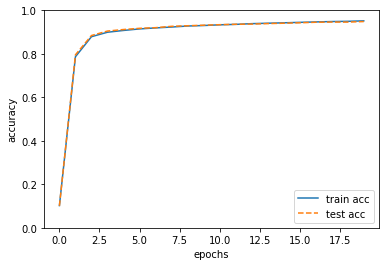

In [18]:
#지금부터의 코드는 위에서 만든 클랙스를 객체화시키고 필기체 데이터를 불러와서
#객체화시킨 신경망에 100개씩 입력해서 학습시키는 코드
# coding: utf-8
import sys, os
sys.path.append(os.pardir)  # 부모 디렉터리의 파일을 가져올 수 있도록 설정
import numpy as np
import matplotlib.pyplot as plt #정확도를 시각화하기 위해서 필요
from dataset.mnist import load_mnist #필기체 데이터를 불러오는 코드
#from two_layer_net import TwoLayerNet

# 데이터 읽기
(x_train, t_train), (x_test, t_test) = load_mnist(normalize=True, one_hot_label=True)

network = TwoLayerNet(input_size=784, hidden_size=50, output_size=10)

# 하이퍼파라미터
iters_num = 12000  # 반복 횟수를 적절히 설정한다. => 10에폭 돌게 설정
train_size = x_train.shape[0]
batch_size = 100   # 미니배치 크기
learning_rate = 0.1 #학습률

train_loss_list = [] #오차를 담을 리스트(시각화를 위해서 데이터를 저장)
train_acc_list = [] #훈련데이터의 정확도를 담을 리스트(시각화를 위해서 데이터를 저장)
test_acc_list = [] #테스트 데이터의 정확도를 담을 리스트(시각화를 위해서 데이터를 저장)

# 1에폭당 반복 수
iter_per_epoch = max(train_size / batch_size, 1) #60000 / 10 = 600
# 1에폭당 정확도를 시각화하기 위해 필요한 코드입니다

for i in range(iters_num): #i가 1부터 6000번 루프문 도는데,
    # 미니배치 획득
    batch_mask = np.random.choice(train_size, batch_size) #(60000, 100) 0~60000미만 숫자 중 100개의 숫자를 랜덤추출
    x_batch = x_train[batch_mask] #위의 100개 랜덤을 batch_mask에 담아서 훈련데이터로 만듬(100개)
    t_batch = t_train[batch_mask] #훈련데이터의 정답 100개
    
    # 기울기 계산
    #grad = network.numerical_gradient(x_batch, t_batch)
    grad = network.gradient(x_batch, t_batch)
    
    # 매개변수 갱신
    for key in ('W1', 'b1', 'W2', 'b2'): #가중치와 비어스를 갱신 => 1에폭 도는 동안 반복(학습)
        network.params[key] -= learning_rate * grad[key]
    
    # 학습 경과 기록
    loss = network.loss(x_batch, t_batch) #오차를 담는다. 밑에서 사용하지는 않음.
    train_loss_list.append(loss)
    
    # 1에폭당 정확도 계산
    if i % iter_per_epoch == 0: #1에폭 돌 때 아래의 코드를 실행해라
        train_acc = network.accuracy(x_train, t_train) #훈련데이터의 정확도 출력 : 60,000개
        test_acc = network.accuracy(x_test, t_test) #테스트 데이터 정확도 출력: 10,000개
        train_acc_list.append(train_acc)
        test_acc_list.append(test_acc)
        print("train acc, test acc | " + str(train_acc) + ", " + str(test_acc))

# 그래프 그리기 => 시각화해서 잘 돌았는지 확인을 위해서
markers = {'train': 'o', 'test': 's'}
x = np.arange(len(train_acc_list))
plt.plot(x, train_acc_list, label='train acc')
plt.plot(x, test_acc_list, label='test acc', linestyle='--')
plt.xlabel("epochs")
plt.ylabel("accuracy")
plt.ylim(0, 1.0)
plt.legend(loc='lower right')
plt.show()
